In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy as sp

In [3]:
Energy = pd.read_excel('ENB2012_data.xlsx')
Energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
Column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3':'Wall_Area', 'X4':'Roof_Area','X5':'Overall_Height', 'X6':'Orientation','X7':'Glazing_Area', 'X8':'Glazing_Area_Distribution', 'Y1':'Heating_Load', 'Y2':'Cooling_Load' }
Energy = Energy.rename(columns = Column_names)
Energy

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


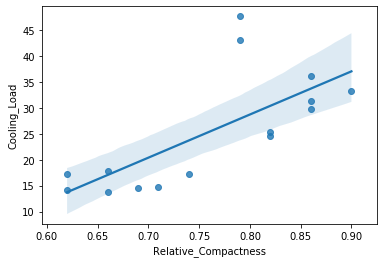

In [11]:
simple_linear_reg_Energy = Energy[['Relative_Compactness','Cooling_Load']].sample(15, random_state=2)
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_Energy)

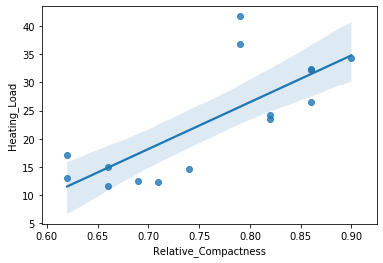

In [9]:
simple_linear_reg_Energy = Energy[['Relative_Compactness','Heating_Load']].sample(15, random_state=2)
sns.regplot(x="Relative_Compactness", y="Heating_Load", data=simple_linear_reg_Energy)

In [16]:
Energy.keys()

Index(['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area',
       'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'],
      dtype='object')

In [27]:
#First we normslise the dataset to a common scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_Energy = pd.DataFrame(scaler.fit_transform(Energy), columns=Energy.columns)
features_Energy = normalised_Energy.drop(columns=['Heating_Load','Cooling_Load'])
heating_target = normalised_Energy['Heating_Load']

In [28]:
#Split Data set into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_Energy, heating_target, test_size=0.3, random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the trianing dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = pd.DataFrame(linear_model.predict(X_test))

In [39]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [46]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0      25.239
3       0.000
8       0.000
11      0.000
13      0.000
        ...  
756     0.000
757     0.000
760     0.000
761     0.000
765     0.000
Length: 231, dtype: float64

In [47]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [35]:
features_Energy

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


In [45]:
predicted_values.head(16).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.187378,0.579224,0.742065,0.714478,0.758423,0.247437,0.166626,0.603516,0.247803,0.545776,0.319336,0.660645,0.693359,0.305054,0.189087,0.716431


In [57]:
predicted_values.shape

(231, 1)

In [79]:
# Comparing the effects of regularisation
def get_weights_df(linear_model, feat, col_name):
    #this function returns the weights of every feature
    weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [80]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5, normalize = True)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [81]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001, normalize= True)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_Weight')

In [83]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features')

In [84]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Surface_Area,-2.071789e+13,-0.104183,-0.000000
1,Relative_Compactness,-7.186113e-01,0.065490,0.000000
2,Glazing_Area_Distribution,-1.572609e-03,0.022088,0.000000
3,Orientation,1.225281e-02,0.011480,0.000000
4,Glazing_Area,1.636963e-01,0.107100,0.092405
5,Overall_Height,3.828125e-01,0.152195,0.393894
6,Wall_Area,1.208543e+13,0.210628,0.119346
7,Roof_Area,1.553842e+13,-0.137771,-0.000000


In [48]:
#First we normslise the dataset to a common scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_Energy = pd.DataFrame(scaler.fit_transform(Energy), columns=Energy.columns)
features_Energy = normalised_Energy.drop(columns=['Heating_Load','Cooling_Load'])
heating_target = normalised_Energy['Cooling_Load']

In [49]:
#Split Data set into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_Energy, heating_target, test_size=0.3, random_state=1)

In [50]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the trianing dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = pd.DataFrame(linear_model.predict(X_test))

In [52]:
predicted_values.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.105957,0.515625,0.638184,0.629395,0.641602,0.159668,0.102051,0.508789,0.18457,0.501953,0.220703,0.577148,0.608887,0.22998,0.137695


In [53]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.863

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.067

In [55]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0      16.048
3       0.000
8       0.000
11      0.000
13      0.000
        ...  
756     0.000
757     0.000
760     0.000
761     0.000
765     0.000
Length: 231, dtype: float64

In [56]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.095

In [60]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5, normalize = True)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [62]:
# Feature slection and Lasso regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001, normalize= True)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
# Comparing the effects of regularisation
def get_weights_df(linear_model, feat, col_name):
    #this function returns the weights of every feature
    weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [74]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5, normalize = True)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [75]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001, normalize= True)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_Weight')

In [77]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features')

In [78]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Surface_Area,-2.071789e+13,-0.104183,-0.000000
1,Relative_Compactness,-7.186113e-01,0.065490,0.000000
2,Glazing_Area_Distribution,-1.572609e-03,0.022088,0.000000
3,Orientation,1.225281e-02,0.011480,0.000000
4,Glazing_Area,1.636963e-01,0.107100,0.092405
5,Overall_Height,3.828125e-01,0.152195,0.393894
6,Wall_Area,1.208543e+13,0.210628,0.119346
7,Roof_Area,1.553842e+13,-0.137771,-0.000000
